# Introduction to Linear regression with Python

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

# turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#import sklearn
#from sklearn.linear_model import LinearRegression

## Read in updated movies dataset

In [2]:
movies_data = pd.read_csv("updated_movies_data.csv")

C:\Users\atrea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Read in ratings dataset

In [3]:
ratings_data = pd.read_csv("IMDb ratings.csv")

In [4]:
ratings_data.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.90000,154,5.90000,6.00000,12,4,10,43,28,...,5.70000,13.00000,4.50000,4.00000,5.70000,34.00000,6.40000,51.00000,6.00000,70.00000
1,tt0000574,6.10000,589,6.30000,6.00000,57,18,58,137,139,...,6.20000,23.00000,6.60000,14.00000,6.40000,66.00000,6.00000,96.00000,6.20000,331.00000
2,tt0001892,5.80000,188,6.00000,6.00000,6,6,17,44,52,...,5.80000,4.00000,6.80000,7.00000,5.40000,32.00000,6.20000,31.00000,5.90000,123.00000
3,tt0002101,5.20000,446,5.30000,5.00000,15,8,16,62,98,...,5.50000,14.00000,6.10000,21.00000,4.90000,57.00000,5.50000,207.00000,4.70000,105.00000
4,tt0002130,7.00000,2237,6.90000,7.00000,210,225,436,641,344,...,7.30000,82.00000,7.40000,77.00000,6.90000,139.00000,7.00000,488.00000,7.00000,1166.00000


## Merge two data frames together.  "Inner" join will return all records with a match on imdb_title_id between the two datasets

In [5]:
combined_data = pd.merge(movies_data, ratings_data, how = "inner", on = ["imdb_title_id"])

In [6]:
combined_data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,usa,None,Alexander Black,...,5.70000,13.00000,4.50000,4.00000,5.70000,34.00000,6.40000,51.00000,6.00000,70.00000
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,australia,None,Charles Tait,...,6.20000,23.00000,6.60000,14.00000,6.40000,66.00000,6.00000,96.00000,6.20000,331.00000
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"germany, denmark",NaN,Urban Gad,...,5.80000,4.00000,6.80000,7.00000,5.40000,32.00000,6.20000,31.00000,5.90000,123.00000
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,usa,English,Charles L. Gaskill,...,5.50000,14.00000,6.10000,21.00000,4.90000,57.00000,5.50000,207.00000,4.70000,105.00000
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.30000,82.00000,7.40000,77.00000,6.90000,139.00000,7.00000,488.00000,7.00000,1166.00000


## Get subset of columns and drop any records with missing values

In [7]:
need = combined_data[["votes", "worlwide_gross_income", "usa_gross_income", "duration", "weighted_average_vote"]]
need = need.dropna()

In [8]:
need.shape

(14166, 5)

## Plot US gross income against Worldwide gross income

<AxesSubplot:xlabel='usa_gross_income', ylabel='worlwide_gross_income'>

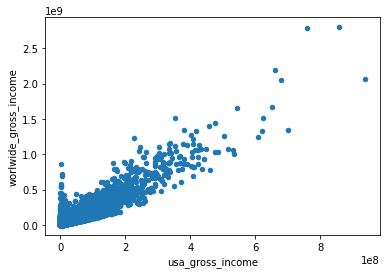

In [9]:
movies_data.plot.scatter(x = "usa_gross_income", y = "worlwide_gross_income")

## Run linear regression model

In [10]:
# Create a linear regression model
linear_model = smf.ols(formula='worlwide_gross_income ~ usa_gross_income', data = need).fit()

In [11]:
# Look at the parameters
linear_model.params

Intercept          -4472268.69146
usa_gross_income          2.37420
dtype: float64

In [12]:
linear_model.params["usa_gross_income"]

2.3741967257873338

In [13]:
# Get p-values for each parameter
linear_model.pvalues

Intercept          0.00000
usa_gross_income   0.00000
dtype: float64

In [14]:
linear_model.rsquared

0.8691879807730383

## Add linear regression line to plot

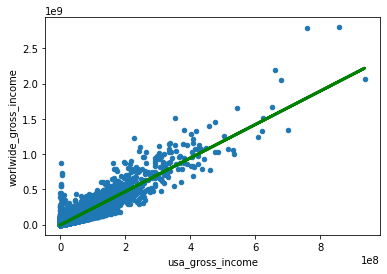

In [15]:
need.plot.scatter(x = "usa_gross_income", y = "worlwide_gross_income")
plt.plot(need.usa_gross_income, linear_model.predict(need.usa_gross_income), color='green', linewidth=3)

## Plot votes against Worldwide Gross Income

<AxesSubplot:xlabel='votes', ylabel='worlwide_gross_income'>

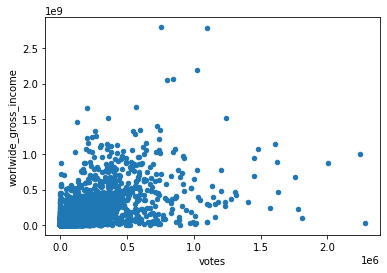

In [16]:
movies_data.plot.scatter(x = "votes", y = "worlwide_gross_income")

## Regress Worldwide income against votes

In [17]:
# Create a linear regression model
votes_model = smf.ols(formula='worlwide_gross_income ~ votes', data = need).fit()

## Add linear regression line

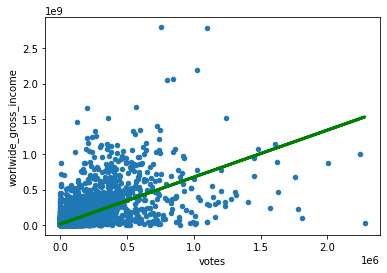

In [18]:
movies_data.plot.scatter(x = "votes", y = "worlwide_gross_income")
plt.plot(need.votes, votes_model.predict(need.votes), color='green', linewidth=3)

In [19]:
votes_model.params

Intercept   12011531.62282
votes            665.13911
dtype: float64

In [20]:
votes_model.pvalues

Intercept   0.00000
votes       0.00000
dtype: float64

In [21]:
votes_model.rsquared

0.41670187543566095

# Linear regression with multiple variables

In [22]:
# create a fitted model
multi_lm = smf.ols(formula='worlwide_gross_income ~ votes + usa_gross_income', data = need).fit()

# print the coefficients
multi_lm.params

Intercept          -5084457.48928
votes                    40.22923
usa_gross_income          2.30765
dtype: float64

In [23]:
multi_lm.pvalues

Intercept          0.00000
votes              0.00000
usa_gross_income   0.00000
dtype: float64

In [24]:
multi_lm.rsquared

0.8700295211348938

In [35]:
# create a fitted model
multi_lm = smf.ols(formula='worlwide_gross_income ~ votes + usa_gross_income + duration + weighted_average_vote',
                   data = need).fit()

# print the coefficients
multi_lm.params

Intercept               -12434115.07350
votes                          39.74128
usa_gross_income                2.30299
duration                   160939.46919
weighted_average_vote    -1535542.91757
dtype: float64

In [31]:
multi_lm.pvalues

Intercept          0.00000
votes              0.00000
usa_gross_income   0.00000
duration           0.00000
dtype: float64

In [32]:
multi_lm.rsquared

0.8705953151828038

In [33]:
# Get prediction
pred = multi_lm.predict(need[["votes", "usa_gross_income", "duration", "weighted_average_vote"]])
pred
eval_measures.rmse(need.worlwide_gross_income, pred)

165     -7229079.64093
245     22781291.18808
254     -1916212.36535
258     -5961937.64720
401     -7410731.20242
             ...      
85740   19553932.13778
85788   -4299988.13060
85801   -3524765.49295
85803   -7832135.72448
85838   -1578856.69035
Length: 14166, dtype: float64

In [29]:
# Calculate RMSE
eval_measures.rmse(need.worlwide_gross_income, pred)

45685512.86483511